
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет:    

In [21]:
import pandas as pd  # Для работы с таблицами
import numpy as np  # Для числовых операций
import matplotlib.pyplot as plt  # Для построения графиков
import seaborn as sns  # Для более красивой визуализации данных
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_ind, f_oneway  # Для проверки статистических гипотез

In [2]:
#importing
shopping_trends = pd.read_csv('shopping_trends.csv')

In [4]:
#столбцы с которыми можно работать
shopping_trends.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [5]:
shopping_trends.info()
#Проверяем на отсутствие нул значений и смотрим тип каждого столбца

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [7]:
shopping_trends.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [8]:
shopping_trends.head(7)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly


<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

<h3>Гипотеза 1: Мужчины и женщины предпочитают разные категории товаров</h3>
Составим таблицу сопряжённости и проверим статистически значимые различия.

In [10]:
# Таблица сопряженности
gender_category_table = pd.crosstab(shopping_trends['Gender'], shopping_trends['Category'])

# Хи-квадрат тест
chi2, p, _, _ = chi2_contingency(gender_category_table)
print(f"Chi2 = {chi2}, p-value = {p}")
if p < 0.05:
    print("Гипотеза подтверждается: Мужчины и женщины выбирают разные категории.")
else:
    print("Гипотеза не подтверждается.")


Chi2 = 0.5984208314833445, p-value = 0.8967937925861854
Гипотеза не подтверждается.


<h3>Гипотеза 2: Люди, использующие подписку, тратят больше денег в среднем.</h3>

In [18]:
subscribed = shopping_trends[shopping_trends['Subscription Status'] == 'Yes']
non_subscribed = shopping_trends[shopping_trends['Subscription Status'] == 'No']
avg_subscribed = subscribed['Purchase Amount (USD)'].mean()
avg_non_subscribed = non_subscribed['Purchase Amount (USD)'].mean()
print(f"Cредние затраты людей с подпиской: {avg_subscribed}, Без подписки: {avg_non_subscribed}")
t_stat, p_value = ttest_ind(subscribed['Purchase Amount (USD)'], non_subscribed['Purchase Amount (USD)'], equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {p_value}")
if p_value < 0.05:
    print("Гипотеза подтверждается")
else:
    print("Гипотеза не подтверждается.")

Cредние затраты людей с подпиской: 59.49192782526116, Без подписки: 59.865121180189675
T-statistic: -0.4395786253862316, p-value: 0.660292253988034
Гипотеза не подтверждается.


<h3>Гипотеза 3: Люди, использующие кредитные карты (Credit Card), тратят больше денег в среднем, чем при использовании других методов оплаты.</h3>

In [22]:
# Группируем данные по методу оплаты
grouped_data = shopping_trends.groupby('Payment Method')['Purchase Amount (USD)']

# Считаем среднюю сумму покупки для каждого метода
average_purchase = grouped_data.mean()
print("Средняя сумма покупки по методам оплаты:")
print(average_purchase)

# Выделяем данные для кредитной карты и остальных методов
credit_card_spending = shopping_trends[shopping_trends['Payment Method'] == 'Credit Card']['Purchase Amount (USD)']
other_methods_spending = shopping_trends[shopping_trends['Payment Method'] != 'Credit Card']['Purchase Amount (USD)']

# Проверяем значимость различий с помощью ANOVA

anova_stat, anova_p_value = f_oneway(
    credit_card_spending,
    *[shopping_trends[shopping_trends['Payment Method'] == method]['Purchase Amount (USD)'] 
      for method in shopping_trends['Payment Method'].unique() if method != 'Credit Card']
)

print(f"ANOVA статистика: {anova_stat}, p-value: {anova_p_value}")
if anova_p_value < 0.05:
    print("Есть значимые различия между методами оплаты.")

# Дополнительно: проверка t-теста между Credit Card и всеми остальными методами

t_stat, t_p_value = ttest_ind(credit_card_spending, other_methods_spending, equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {t_p_value}")
if t_p_value < 0.05:
    print("Люди с кредитной картой тратят значимо больше.")
else:
    print("Различия не являются значимыми.")


Средняя сумма покупки по методам оплаты:
Payment Method
Bank Transfer    58.738924
Cash             59.927469
Credit Card      61.159483
Debit Card       58.638231
PayPal           58.697492
Venmo            61.241960
Name: Purchase Amount (USD), dtype: float64
ANOVA статистика: 1.7811454949409928, p-value: 0.11316179478133732
T-statistic: 1.7137884797912448, p-value: 0.08687181238598346
Различия не являются значимыми.


<h3>Гипотеза 4: Люди из штата California тратят больше в среднем, чем люди из других локаций.</h3>

In [23]:
# Создаём выборки
california_spending = shopping_trends[shopping_trends['Location'] == 'California']['Purchase Amount (USD)']
other_locations_spending = shopping_trends[shopping_trends['Location'] != 'California']['Purchase Amount (USD)']

# Считаем средние значения
california_mean = california_spending.mean()
other_locations_mean = other_locations_spending.mean()
print(f"Средняя сумма покупок в California: {california_mean}")
print(f"Средняя сумма покупок в других локациях: {other_locations_mean}")

# Проверяем значимость различий с помощью t-теста
t_stat, p_value = ttest_ind(california_spending, other_locations_spending, equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

# Вывод результата
if p_value < 0.05:
    print("Гипотеза подтверждается: Люди из California тратят больше в среднем.")
else:
    print("Гипотеза не подтверждается: Различия не являются значимыми.")


Средняя сумма покупок в California: 59.0
Средняя сумма покупок в других локациях: 59.78344283837057
T-statistic: -0.3161307684294565, p-value: 0.7525709637678
Гипотеза не подтверждается: Различия не являются значимыми.


<h3>Гипотеза 5: Люди в возрасте от 21 до 50 лет тратят в среднем больше денег, чем группы младше 20 и старше 50 лет.</h3>

In [24]:
# Создаём группы по возрасту
bins = [0, 20, 50, 100]
labels = ['До 20 лет', '21-50 лет', 'Старше 50 лет']
shopping_trends['Age Group'] = pd.cut(shopping_trends['Age'], bins=bins, labels=labels)

# Считаем средние значения для каждой группы
age_group_means = shopping_trends.groupby('Age Group')['Purchase Amount (USD)'].mean()
print("Средняя сумма покупок по возрастным группам:")
print(age_group_means)

# Выделяем выборки
under_20 = shopping_trends[shopping_trends['Age Group'] == 'До 20 лет']['Purchase Amount (USD)']
between_21_50 = shopping_trends[shopping_trends['Age Group'] == '21-50 лет']['Purchase Amount (USD)']
over_50 = shopping_trends[shopping_trends['Age Group'] == 'Старше 50 лет']['Purchase Amount (USD)']

# Проверяем значимость различий с помощью ANOVA
anova_stat, anova_p_value = f_oneway(under_20, between_21_50, over_50)
print(f"ANOVA статистика: {anova_stat}, p-value: {anova_p_value}")

if anova_p_value < 0.05:
    print("Есть значимые различия между возрастными группами.")

# Дополнительно: проверка t-теста между группой 21-50 и другими
under_20_and_over_50 = pd.concat([under_20, over_50])
t_stat, t_p_value = ttest_ind(between_21_50, under_20_and_over_50, equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {t_p_value}")

if t_p_value < 0.05:
    print("Группа 21-50 лет тратит значимо больше.")
else:
    print("Группа 21-50 лет не тратит значимо больше.")

Средняя сумма покупок по возрастным группам:
Age Group
До 20 лет        58.981132
21-50 лет        59.718354
Старше 50 лет    59.945799
Name: Purchase Amount (USD), dtype: float64
ANOVA статистика: 0.1633196445311046, p-value: 0.8493254775619208
T-statistic: -0.1385763803833234, p-value: 0.8897926487753411
Группа 21-50 лет не тратит значимо больше.


<h3>Гипотеза 6: Клиенты, использующие промокоды, ставят более высокие оценки покупок (Review Rating), чем те, кто не использует промокоды.</h3>

In [25]:
# Создаём выборки
promo_used = shopping_trends[shopping_trends['Promo Code Used'] == 'Yes']['Review Rating']
promo_not_used = shopping_trends[shopping_trends['Promo Code Used'] == 'No']['Review Rating']

# Считаем средние оценки
avg_rating_with_promo = promo_used.mean()
avg_rating_without_promo = promo_not_used.mean()

print(f"Средняя оценка с промокодом: {avg_rating_with_promo}")
print(f"Средняя оценка без промокода: {avg_rating_without_promo}")

# Проверяем значимость различий с помощью t-теста
t_stat, p_value = ttest_ind(promo_used, promo_not_used, equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

# Интерпретация
if p_value < 0.05:
    print("Гипотеза подтверждается: Клиенты с промокодами оставляют более высокие оценки.")
else:
    print("Гипотеза не подтверждается: Использование промокодов не влияет на оценки.")

Средняя оценка с промокодом: 3.739654144305303
Средняя оценка без промокода: 3.757714799820062
T-statistic: -0.7793383581645102, p-value: 0.43583158342101125
Гипотеза не подтверждается: Использование промокодов не влияет на оценки.


<h3>Гипотеза 7: Женщины чаще покупают розовые вещи, чем мужчины.</h3>

In [26]:
# Фильтруем данные
pink_items = shopping_trends[shopping_trends['Color'] == 'Pink']

# Считаем количество розовых покупок по полу
pink_counts = pink_items['Gender'].value_counts()
total_counts = shopping_trends['Gender'].value_counts()

# Рассчитываем доли
pink_ratios = pink_counts / total_counts
print("Доля розовых покупок:")
print(pink_ratios)

# Создаём таблицу сопряжённости
contingency_table = pd.crosstab(shopping_trends['Gender'], shopping_trends['Color'] == 'Pink')

# Тест хи-квадрат
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2_stat}, p-value: {p_value}")

# Интерпретация результатов
if p_value < 0.05:
    print("Гипотеза подтверждается: Женщины чаще покупают розовые вещи, чем мужчины.")
else:
    print("Гипотеза не подтверждается: Выбор розового цвета не зависит от пола.")

Доля розовых покупок:
Male      0.035822
Female    0.046474
Name: Gender, dtype: float64
Chi-squared statistic: 2.2800603035292517, p-value: 0.1310467782607279
Гипотеза не подтверждается: Выбор розового цвета не зависит от пола.


<h3>Гипотеза 8: Женщины чаще покупают товары из категории "Accessories", чем мужчины.</h3>

In [28]:
# Фильтруем данные
accessories_items = shopping_trends[shopping_trends['Category'] == 'Accessories']

# Считаем количество покупок аксессуаров по полу
accessories_counts = accessories_items['Gender'].value_counts()
total_counts = shopping_trends['Gender'].value_counts()

# Рассчитываем доли
accessories_ratios = accessories_counts / total_counts
print("Доля покупок аксессуаров:")
print(accessories_ratios)

# Создаём таблицу сопряжённости
contingency_table = pd.crosstab(shopping_trends['Gender'], shopping_trends['Category'] == 'Accessories')

# Тест хи-квадрат
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2_stat}, p-value: {p_value}")

# Интерпретация результатов
if p_value < 0.05:
    print("Гипотеза подтверждается: Женщины чаще покупают аксессуары, чем мужчины.")
else:
    print("Гипотеза не подтверждается: Покупки аксессуаров не зависят от пола.")

Доля покупок аксессуаров:
Male      0.319759
Female    0.314103
Name: Gender, dtype: float64
Chi-squared statistic: 0.10047067160905018, p-value: 0.7512655391929199
Гипотеза не подтверждается: Покупки аксессуаров не зависят от пола.


<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 

<h3>1. Найти самый популярный товар</h3>

In [38]:
# Находим самый популярный товар
print(shopping_trends['Item Purchased'].value_counts().head(5))
# Подсчет количества покупок каждого товара
item_counts = shopping_trends['Item Purchased'].value_counts()

# Находим максимальное количество покупок
max_count = item_counts.max()

# Выбираем все товары с максимальным количеством покупок
most_popular_items = item_counts[item_counts == max_count].index.tolist()

print(f"Самые популярные товары: {', '.join(most_popular_items)}")


Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: Item Purchased, dtype: int64
Самые популярные товары: Blouse, Jewelry, Pants


<h3>2. Построить распределение покупателей по полу</h3>

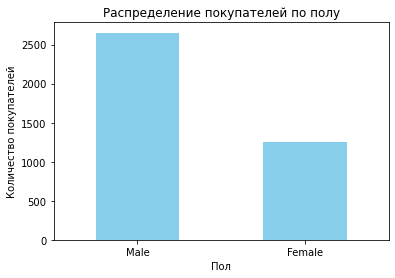

In [31]:
import matplotlib.pyplot as plt

# Распределение по полу
gender_distribution = shopping_trends['Gender'].value_counts()

# Построение графика
gender_distribution.plot(kind='bar', color='skyblue')
plt.title('Распределение покупателей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество покупателей')
plt.xticks(rotation=0)
plt.show()

<h3>3. определить, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары</h3>

In [52]:
# 1. Пол, который покупает больше всего
gender_spending = shopping_trends.groupby('Gender')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
print("Распределение покупок по полу:")
print(gender_spending)
print(f"Пол, который покупает больше всего: {gender_spending.index[0]}")


Распределение покупок по полу:
Gender
Male      157890
Female     75191
Name: Purchase Amount (USD), dtype: int64
Пол, который покупает больше всего: Male


In [118]:
# 2. Возраст, который покупает больше всего
age_spending = shopping_trends.groupby('Age')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
print("\nТоп-5 возраста, которые покупают больше всего:")
print(age_spending.head(5))
print(f"Возраст, который покупает больше всего: {age_spending.index[0]}")


Топ-5 возраста, которые покупают больше всего:
Age
49    5552
69    5484
25    5372
41    5282
54    5282
Name: Purchase Amount (USD), dtype: int64
Возраст, который покупает больше всего: 49


In [49]:
# 3. Пол, который чаще всего покупает
gender_frequency = shopping_trends['Gender'].value_counts()
print("\nРаспределение частоты покупок по полу:")
print(gender_frequency)
print(f"Пол, который чаще всего покупает: {gender_frequency.index[0]}")


Распределение частоты покупок по полу:
Male      2652
Female    1248
Name: Gender, dtype: int64
Пол, который чаще всего покупает: Male


In [51]:
# 4. Возраст, который чаще всего покупает
age_frequency = shopping_trends['Age'].value_counts()
print("\nТоп-5 возраста, которые чаще всего покупают:")
print(age_frequency.head(5))
print(f"Возраст, который чаще всего покупает: {age_frequency.index[0]}")


Топ-5 возраста, которые чаще всего покупают:
69    88
57    87
41    86
25    85
49    84
Name: Age, dtype: int64
Возраст, который чаще всего покупает: 69


In [56]:
# 5. Самые дорогие товары по полу и возрасту
max_purchase_amount = shopping_trends['Purchase Amount (USD)'].max()
top_purchases = shopping_trends[shopping_trends['Purchase Amount (USD)'] == max_purchase_amount]

print("\nВсе покупки с максимальной стоимостью:")
print(top_purchases[['Gender', 'Age', 'Purchase Amount (USD)', 'Item Purchased']])

print(f"\nКоличество покупок с максимальной стоимостью: {len(top_purchases)}")

print("\nУникальные комбинации пола и возраста для максимальных покупок:")
unique_combinations = top_purchases.groupby(['Gender', 'Age']).size().reset_index(name='Count')
print(unique_combinations)

# Найти комбинацию с наибольшим 'Count'
max_count_combination = unique_combinations.sort_values(by='Count', ascending=False).iloc[0]
print("\nКомбинация пола и возраста с наибольшим количеством покупок:")
print(max_count_combination)


Все покупки с максимальной стоимостью:
      Gender  Age  Purchase Amount (USD) Item Purchased
42      Male   20                    100           Coat
95      Male   37                    100       Sneakers
193     Male   36                    100           Belt
204     Male   24                    100       Sneakers
243     Male   25                    100        Jewelry
248     Male   47                    100           Belt
455     Male   54                    100         Blouse
518     Male   24                    100         Blouse
581     Male   32                    100        Sweater
615     Male   67                    100        Sandals
769     Male   52                    100          Socks
861     Male   46                    100          Skirt
1208    Male   20                    100          Boots
1300    Male   67                    100        T-shirt
1405    Male   33                    100          Socks
1412    Male   25                    100         Shorts
1421    

<h3>4. Определить, есть ли зависимость между цветом одежды и сезоном.</h3>

In [66]:

# Таблица сопряженности
color_season_contingency = shopping_trends.groupby(['Color', 'Season']).size().unstack(fill_value=0)
# Хи-квадрат тест
chi2_stat, p_value, dof, expected = chi2_contingency(color_season_contingency)

# Вывод результатов
print(f"Chi-squared statistic: {chi2_stat :.3}")
print(f"p-value: {p_value :.3}")
print(f"Degrees of freedom: {dof}")

# Интерпретация результата
if p_value < 0.05:
    print("Есть статистически значимая зависимость между цветом одежды и сезоном.")
else:
    print("Статистически значимой зависимости между цветом одежды и сезоном нет.")


Chi-squared statistic: 64.7
p-value: 0.719
Degrees of freedom: 72
Статистически значимой зависимости между цветом одежды и сезоном нет.


<h3>5. Посчитать наш сезонный mau (уникальных пользователей за сезон) и его динамику.</h3>

Сезонный MAU:
Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64


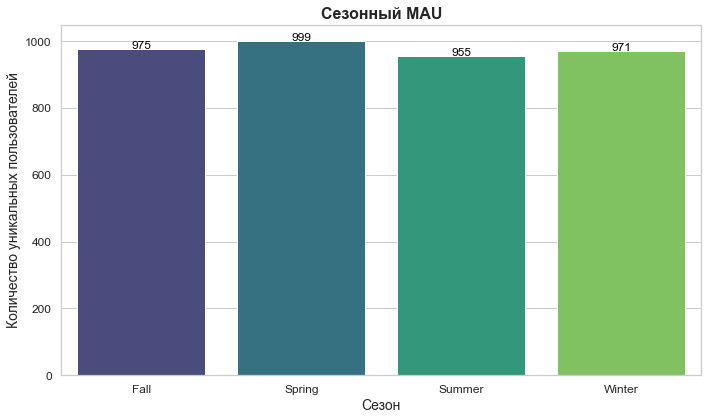

In [70]:
# Сезонный MAU
seasonal_mau = shopping_trends.groupby('Season')['Customer ID'].nunique()
print("Сезонный MAU:")
print(seasonal_mau)

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_mau.index, y=seasonal_mau.values, palette="viridis")

# Добавляем подписи к столбцам
for i, value in enumerate(seasonal_mau.values):
    plt.text(i, value + 2, f"{value}", ha='center', fontsize=12, color='black')

# Оформление
plt.title('Сезонный MAU', fontsize=16, weight='bold')
plt.xlabel('Сезон', fontsize=14)
plt.ylabel('Количество уникальных пользователей', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<h3>6. Найти самую популярную букву в названии одежды.</h3>

In [71]:
from collections import Counter

# Объединение всех названий товаров в одну строку и подсчет букв
all_letters = ''.join(shopping_trends['Item Purchased']).replace(' ', '').lower()
letter_counts = Counter(all_letters)

# Получение топ-5 самых популярных букв
top_5_letters = letter_counts.most_common(5)

# Вывод результата
print("Топ-5 самых популярных букв в названиях одежды:")
for letter, count in top_5_letters:
    print(f"Буква '{letter}': {count} вхождений")

Топ-5 самых популярных букв в названиях одежды:
Буква 's': 4063 вхождений
Буква 'e': 2347 вхождений
Буква 'a': 2312 вхождений
Буква 't': 1896 вхождений
Буква 'o': 1528 вхождений


<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [72]:
drinks = pd.read_csv('drinks.csv')

In [75]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [76]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [78]:
#Проверяем на наличие пропусков
drinks.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [79]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [80]:
# Страна с максимальным потреблением пива
max_beer_country = drinks.loc[drinks['beer_servings'].idxmax(), 'country']
max_beer_value = drinks['beer_servings'].max()

# Страна с максимальным потреблением вина
max_wine_country = drinks.loc[drinks['wine_servings'].idxmax(), 'country']
max_wine_value = drinks['wine_servings'].max()

# Страна с максимальным потреблением спиртных напитков
max_spirit_country = drinks.loc[drinks['spirit_servings'].idxmax(), 'country']
max_spirit_value = drinks['spirit_servings'].max()

# Результаты
print(f"Максимальное потребление пива: {max_beer_value} в {max_beer_country}")
print(f"Максимальное потребление вина: {max_wine_value} в {max_wine_country}")
print(f"Максимальное потребление спиртных напитков: {max_spirit_value} в {max_spirit_country}")


Максимальное потребление пива: 376 в Namibia
Максимальное потребление вина: 370 в France
Максимальное потребление спиртных напитков: 438 в Grenada


In [83]:
# Топ-10 стран по потреблению пива
top_beer = drinks.nlargest(10, 'beer_servings')[['country', 'beer_servings']]
print("Топ-10 стран по потреблению пива:")
print(top_beer)
print("\n")

# Топ-10 стран по потреблению вина
top_wine = drinks.nlargest(10, 'wine_servings')[['country', 'wine_servings']]
print("Топ-10 стран по потреблению вина:")
print(top_wine)
print("\n")

# Топ-10 стран по потреблению спиртных напитков
top_spirits = drinks.nlargest(10, 'spirit_servings')[['country', 'spirit_servings']]
print("Топ-10 стран по потреблению спиртных напитков:")
print(top_spirits)


Топ-10 стран по потреблению пива:
            country  beer_servings
117         Namibia            376
45   Czech Republic            361
62            Gabon            347
65          Germany            346
98        Lithuania            343
135          Poland            343
188       Venezuela            333
81          Ireland            313
129           Palau            306
140         Romania            297


Топ-10 стран по потреблению вина:
               country  wine_servings
61              France            370
136           Portugal            339
3              Andorra            312
166        Switzerland            280
48             Denmark            278
156           Slovenia            276
99          Luxembourg            271
42             Croatia            254
83               Italy            237
55   Equatorial Guinea            233


Топ-10 стран по потреблению спиртных напитков:
                country  spirit_servings
68              Grenada              

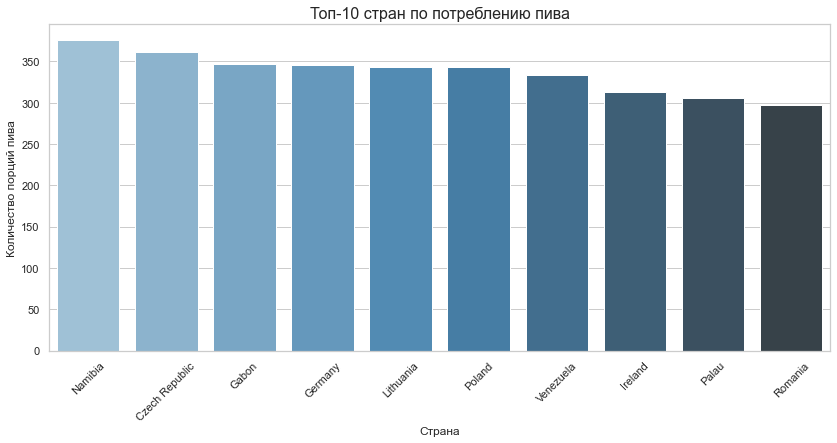

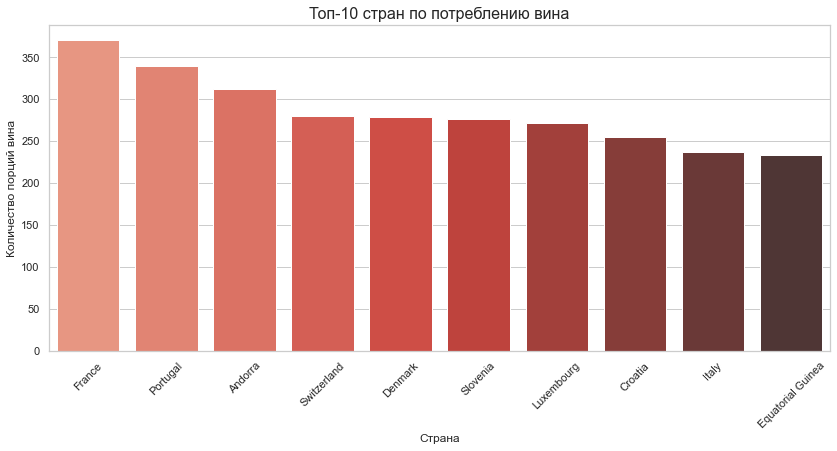

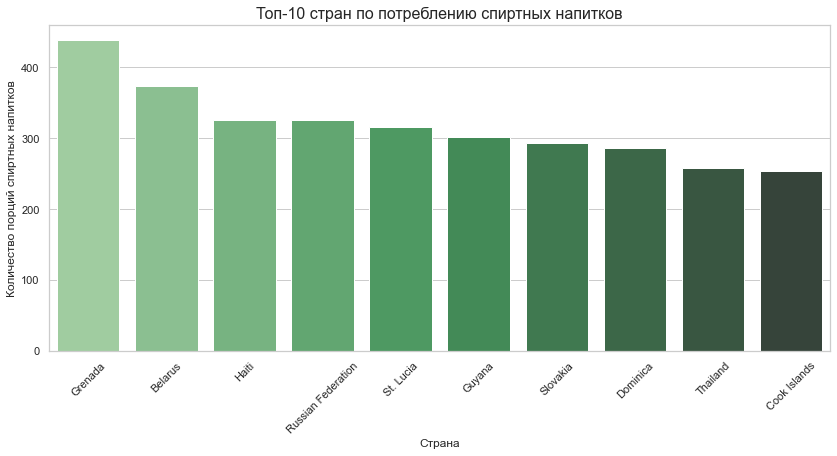

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Графики распределения
plt.figure(figsize=(14, 6))
sns.barplot(x=drinks.nlargest(10, 'beer_servings')['country'], 
            y=drinks.nlargest(10, 'beer_servings')['beer_servings'], palette="Blues_d")
plt.title('Топ-10 стран по потреблению пива', fontsize=16)
plt.ylabel('Количество порций пива', fontsize=12)
plt.xlabel('Страна', fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x=drinks.nlargest(10, 'wine_servings')['country'], 
            y=drinks.nlargest(10, 'wine_servings')['wine_servings'], palette="Reds_d")
plt.title('Топ-10 стран по потреблению вина', fontsize=16)
plt.ylabel('Количество порций вина', fontsize=12)
plt.xlabel('Страна', fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x=drinks.nlargest(10, 'spirit_servings')['country'], 
            y=drinks.nlargest(10, 'spirit_servings')['spirit_servings'], palette="Greens_d")
plt.title('Топ-10 стран по потреблению спиртных напитков', fontsize=16)
plt.ylabel('Количество порций спиртных напитков', fontsize=12)
plt.xlabel('Страна', fontsize=12)
plt.xticks(rotation=45)
plt.show()


<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. 

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 

In [84]:
words = pd.read_csv('tarantino.csv')

In [85]:
words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


In [86]:
words.columns

Index(['movie', 'type', 'word', 'minutes_in'], dtype='object')

In [93]:
words['word'].unique()

array(['dick', 'dicks', 'fucked', 'fucking', 'bullshit', 'fuck', 'shit',
       'motherfucker', 'pussy', 'fucks', 'hell', 'jap', 'bastard',
       'goddamn', 'motherfuckers', 'asshole', 'ass', 'assholes',
       'n-word ', 'asses', 'bitch', 'fuckup', 'fucker', 'shitty',
       'asshead', 'damn', nan, 'damned', 'bitches', 'wetback', 'faggot',
       'cocksucker', 'gook', 'fuckers', 'gooks', 'motherfucking',
       'dickless', 'chickenshit', 'slope', 'fuckhead', 'merde',
       'shithead', 'cunt', 'cunts', 'fuckface', 'cockblockery', 'japs',
       'jew (verb)', 'bastards', 'horeshit', 'shitless', 'shitting',
       'negro ', 'squaw', 'slut', 'goddamned', 'jackass', 'horseshit',
       'shittiest', 'shitload', 'dumbass'], dtype=object)

Для некоторого упрощения будем считать каждое ругательство (кроме нулл значения) уникальным

In [94]:
words['type'].unique()

array(['word', 'death'], dtype=object)

<h3>1. Определить число проклятий, летальных исходов и их соотношение по фильмам</h3>

In [95]:
# Подсчитаем количество проклятий (word) и смертей (death) по фильмам
curse_deaths_count = words.groupby(['movie', 'type']).size().unstack(fill_value=0)

# Рассчитаем соотношение проклятий и смертей
curse_deaths_count['ratio'] = curse_deaths_count['word'] / curse_deaths_count['death']

# Выводим результат
print(curse_deaths_count[['word', 'death', 'ratio']])



type                 word  death      ratio
movie                                      
Django Unchained      262     47   5.574468
Inglorious Basterds    58     48   1.208333
Jackie Brown          368      4  92.000000
Kill Bill: Vol. 1      57     63   0.904762
Kill Bill: Vol. 2      69     11   6.272727
Pulp Fiction          469      7  67.000000
Reservoir Dogs        421     10  42.100000


<h3>2. Определить частоту употребления конкретных проклятий</h3>

In [96]:
# Фильтруем строки с проклятиями (type == 'word')
curse_words = words[words['type'] == 'word']

# Подсчитаем частоту употребления каждого проклятия
curse_frequency = curse_words['word'].value_counts()

# Выводим результат
print(curse_frequency)


fucking          407
shit             221
fuck             213
n-word           179
ass              140
goddamn          113
motherfucker      70
bitch             64
hell              45
damn              37
motherfucking     27
fucked            25
bullshit          15
motherfuckers     15
dick              14
pussy             11
asshole           10
bastard           10
bitches            9
fucker             8
assholes           5
negro              5
dicks              5
asses              4
shitty             4
damned             3
fucks              3
shithead           3
horseshit          2
gooks              2
japs               2
cunt               2
shitload           2
cocksucker         2
wetback            2
fuckers            1
horeshit           1
jap                1
shittiest          1
fuckup             1
jackass            1
goddamned          1
slut               1
squaw              1
asshead            1
shitting           1
shitless           1
bastards     

<h3> 3. Распределение времени между проклятиями</h3>

                 movie  time_diff
0     Django Unchained   0.586398
1  Inglorious Basterds   2.219825
2         Jackie Brown   0.377629
3    Kill Bill: Vol. 1   1.660357
4    Kill Bill: Vol. 2   1.741176
5         Pulp Fiction   0.315449
6       Reservoir Dogs   0.226024


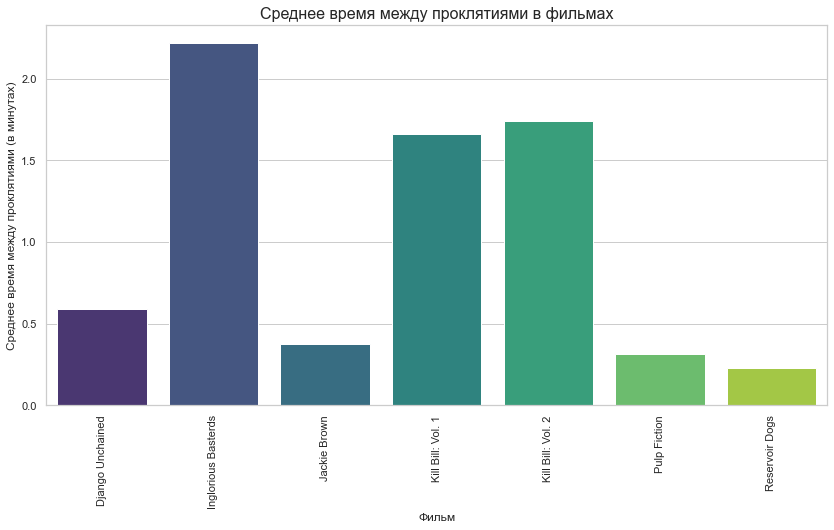

In [102]:
# Фильтруем строки с проклятиями (type == 'word')
curse_words = words[words['type'] == 'word'].copy()  # Создаем явную копию данных

# Рассчитываем разницу во времени между проклятиями для каждого фильма
curse_words['time_diff'] = curse_words.groupby('movie')['minutes_in'].diff()

# Убираем NaN, так как первое проклятие в фильме не имеет предыдущего
curse_words_clean = curse_words.dropna(subset=['time_diff'])

# Теперь получаем время между проклятиями по каждому фильму
time_between_curses = curse_words_clean.groupby('movie')['time_diff'].mean().reset_index()

# Выводим данные для каждого фильма
print(time_between_curses)

# Построим столбчатый график времени между проклятиями по фильмам
plt.figure(figsize=(14, 7))
sns.barplot(x='movie', y='time_diff', data=time_between_curses, palette="viridis")
plt.xticks(rotation=90)
plt.title('Среднее время между проклятиями в фильмах', fontsize=16)
plt.xlabel('Фильм', fontsize=12)
plt.ylabel('Среднее время между проклятиями (в минутах)', fontsize=12)
plt.show()

Топ-20 самых частых временных промежутков между проклятиями:
0.05    142
0.02    119
0.03    112
0.10     86
0.00     81
0.07     67
0.01     66
0.04     59
0.08     51
0.12     40
0.15     40
0.06     35
0.25     32
0.13     30
0.17     25
0.09     25
0.14     24
0.20     21
0.11     20
0.18     17
Name: time_diff, dtype: int64


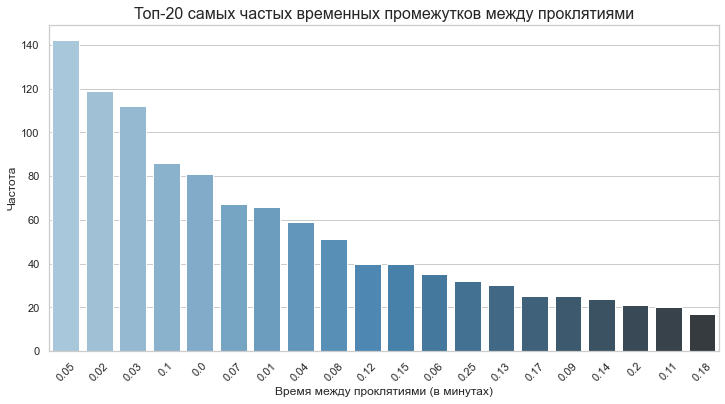

In [117]:
curse_words = words[words['type'] == 'word'].copy()

# Рассчитываем разницу во времени между проклятиями для каждого фильма
curse_words['time_diff'] = curse_words.groupby('movie')['minutes_in'].diff()

# Убираем NaN, так как первое проклятие в фильме не имеет предыдущего
curse_words_clean = curse_words.dropna(subset=['time_diff'])

# Округляем значения time_diff до трех десятичных знаков
curse_words_round['time_diff'] = curse_words_clean['time_diff'].round(3)

# Считаем частоту использования разных временных промежутков
time_diff_frequency = curse_words_round['time_diff'].value_counts().nlargest(20)

# Выводим топ-20 временных промежутков
print("Топ-20 самых частых временных промежутков между проклятиями:")
print(time_diff_frequency)

# Построим столбчатую диаграмму для топ-20 самых частых временных промежутков
plt.figure(figsize=(12, 6))
sns.barplot(x=time_diff_frequency.index, y=time_diff_frequency.values, palette="Blues_d", order=time_diff_frequency.index)

# Настройки графика
plt.title('Топ-20 самых частых временных промежутков между проклятиями', fontsize=16)
plt.xlabel('Время между проклятиями (в минутах)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.xticks(rotation=45)
plt.show()